# 목표 - 데이터 전처리
- 데이터 불러오기
## 데이터 탐색
    - boxplot
    - 정규성
    - t검정 평균이 차이나는지
    - F검정 분산이 차이나는지
    - VIF와 공분산성 확인 ∵다중공선성 문제
## 데이터 전처리
- minmaxscale
- standardscale
- robustscale
- log변환
## 데이터 재탐색
    - 공분산 hitmap
    - VIF 확인
    - 정규성 검증
    - t검정

# for 데이터 전처리

In [267]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: c:\apps\miniproj


In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지 제거
import warnings
warnings.filterwarnings('ignore')

- 데이터 불러오기

In [269]:
df = pd.read_csv(current_directory+'/monthly_data.csv', index_col=0)

## EDA 데이터 탐색 

In [270]:
df

,시점,KRW/USD,경제심리지수(원계열),뉴스심리지수,원자재구입가격실적,"M2(말잔, 원계열)",미국M2,USBIR,KOBIR,KOTN,...,달러결제수출비율,달러결제수입비율,한국생산자물가지수,미국생산자물가지수,한국외환보유액,미국외환보유액,한국실업률,미국실업률,KOSPI,Dow Jones
0,200501,1006.0,95.3,106.39,125,951377.5,6404.1,2.250,3.25,4.420,...,82.3,77.9,86.59,83.65,199699.00,85425.00,3.8,5.3,932.70,10489.94
1,200502,1015.5,108.1,110.62,121,970720.0,6405.7,2.500,3.25,4.880,...,82.9,77.9,86.77,84.04,202162.00,79780.00,3.7,5.4,1011.36,10766.23
2,200503,997.1,110.9,103.98,124,970629.1,6464.9,2.750,3.25,4.770,...,82.0,78.9,86.85,85.20,205447.00,79029.00,3.7,5.2,965.68,10503.76
3,200504,1007.7,110.4,100.87,126,987882.7,6508.3,2.750,3.25,4.690,...,82.5,78.6,87.09,85.93,206376.00,79483.00,3.7,5.2,911.30,10192.51
4,200505,1025.4,103.8,101.94,116,987197.7,6459.8,3.000,3.25,4.420,...,82.6,79.8,86.52,85.54,206100.00,78027.00,3.7,5.1,970.21,10467.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,202112,1205.5,104.5,111.48,129,3613687.6,21646.7,0.125,1.00,2.187,...,84.5,81.1,114.29,133.72,463118.36,251568.25,3.6,3.9,2977.65,36338.30
204,202201,1202.3,105.7,103.28,134,3629712.4,21628.5,0.125,1.25,2.492,...,83.8,84.5,115.49,129.70,461527.00,249552.86,3.3,4.0,2663.34,35131.86
205,202202,1212.1,105.8,103.65,135,3657117.3,21582.5,0.125,1.25,2.690,...,84.5,81.6,116.04,131.17,461766.00,250691.90,2.8,3.8,2699.18,33892.60
206,202203,1255.9,103.5,103.64,153,3652818.7,21855.7,0.375,1.25,2.784,...,85.1,81.8,117.81,133.86,457810.00,246958.19,2.8,3.6,2757.65,34678.35


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시점           208 non-null    int64  
 1   KRW/USD      208 non-null    float64
 2   경제심리지수(원계열)  208 non-null    float64
 3   뉴스심리지수       208 non-null    float64
 4   원자재구입가격실적    208 non-null    int64  
 5   M2(말잔, 원계열)  208 non-null    float64
 6   미국M2         208 non-null    float64
 7   USBIR        208 non-null    float64
 8   KOBIR        208 non-null    float64
 9   KOTN         208 non-null    float64
 10  USTN         208 non-null    float64
 11  달러결제수출금액     208 non-null    float64
 12  달러결제수입금액     208 non-null    float64
 13  달러결제수출비율     208 non-null    float64
 14  달러결제수입비율     208 non-null    float64
 15  한국생산자물가지수    208 non-null    float64
 16  미국생산자물가지수    208 non-null    float64
 17  한국외환보유액      208 non-null    float64
 18  미국외환보유액      208 non-null    float64
 19  한국실업률        

In [272]:
df.describe()

,시점,KRW/USD,경제심리지수(원계열),뉴스심리지수,원자재구입가격실적,"M2(말잔, 원계열)",미국M2,USBIR,KOBIR,KOTN,...,달러결제수출비율,달러결제수입비율,한국생산자물가지수,미국생산자물가지수,한국외환보유액,미국외환보유액,한국실업률,미국실업률,KOSPI,Dow Jones
count,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,201323.730769,1110.497115,100.246635,100.407115,114.139423,2.040421e+06,11526.188462,1.267428,2.391827,3.467966,...,84.483173,81.029808,100.770962,106.245144,329491.165192,121870.743558,3.542788,6.133654,1948.617692,17539.394856
std,501.745479,98.006429,10.546941,9.865561,13.481954,7.214504e+05,4056.271773,1.659244,1.273932,1.431574,...,1.343927,2.136564,7.327668,10.312341,76221.622926,39527.059138,0.340710,2.125921,472.600890,7404.515357
min,200501.000000,900.700000,61.200000,60.040000,90.000000,9.513775e+05,6404.100000,0.125000,0.500000,1.254000,...,80.900000,76.300000,86.130000,83.650000,199699.000000,64473.000000,2.800000,3.500000,911.300000,7062.930000
25%,200904.750000,1062.800000,95.475000,95.560000,104.000000,1.494404e+06,8404.425000,0.125000,1.500000,2.181750,...,83.375000,79.475000,97.100000,99.195000,261524.000000,81590.500000,3.300000,4.575000,1696.930000,11604.525000
50%,201308.500000,1118.900000,100.200000,101.200000,112.000000,1.898877e+06,10771.950000,0.125000,2.000000,3.252500,...,84.500000,80.900000,102.810000,106.920000,334008.000000,125278.870000,3.500000,5.250000,1981.385000,15314.605000
75%,201734.250000,1168.300000,107.250000,106.337500,121.000000,2.536476e+06,13852.600000,2.000000,3.250000,4.912500,...,85.500000,82.500000,105.562500,112.892500,390650.000000,141786.650000,3.700000,7.800000,2115.852500,23558.707500
max,202204.000000,1534.000000,117.100000,119.420000,160.000000,3.675692e+06,21855.700000,5.250000,5.250000,6.030000,...,87.000000,87.000000,119.720000,134.680000,469208.000000,253060.100000,4.800000,14.700000,3296.680000,36338.300000


In [273]:
Mdate = df['시점']
y = df['KRW/USD']
X = df.drop(['시점', 'KRW/USD'], axis=1)

- boxplot

ValueError: 'locs' must be 1D with shape (M,). Your input has shape (1, 14).

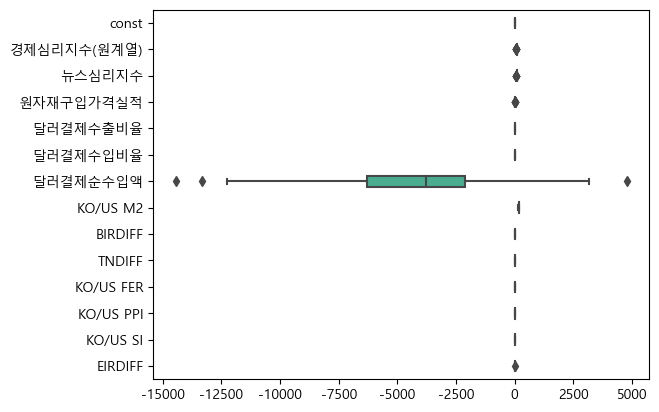

In [312]:
sns.boxplot(data=X, orient="h", width=0.4)
plt.xticks([range(len(X.columns))])

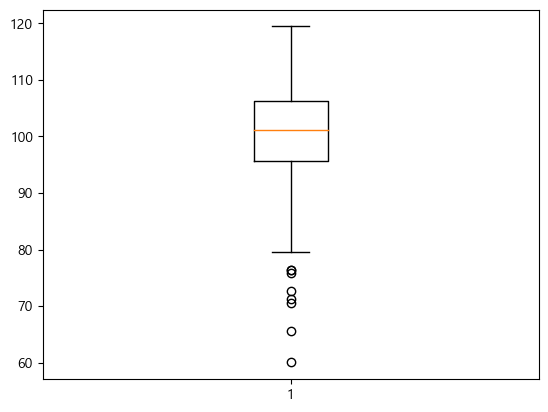

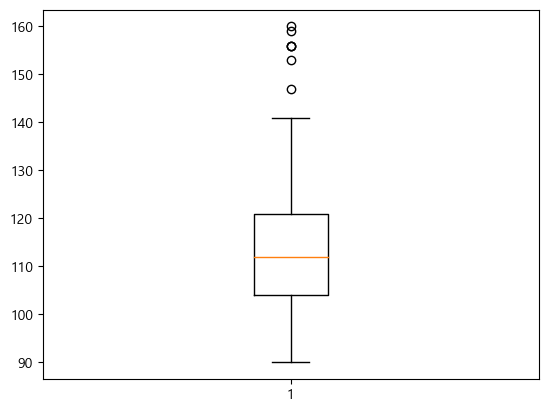

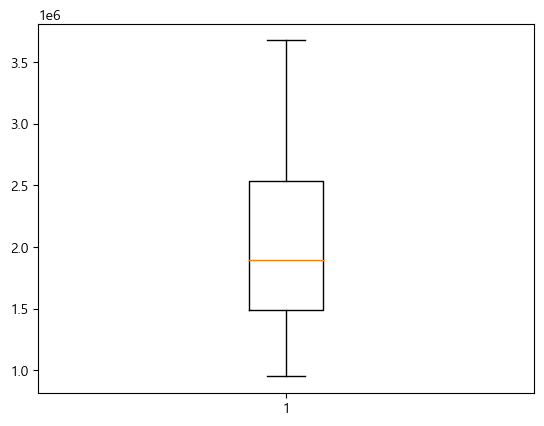

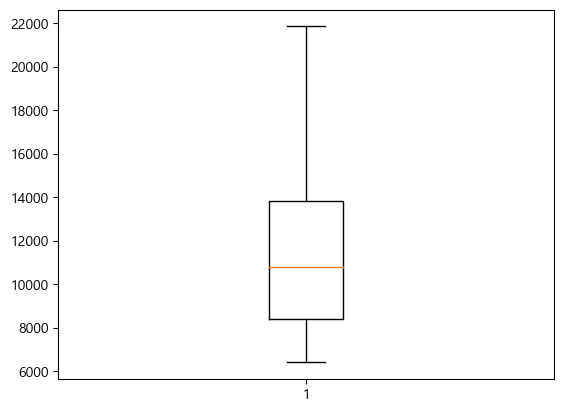

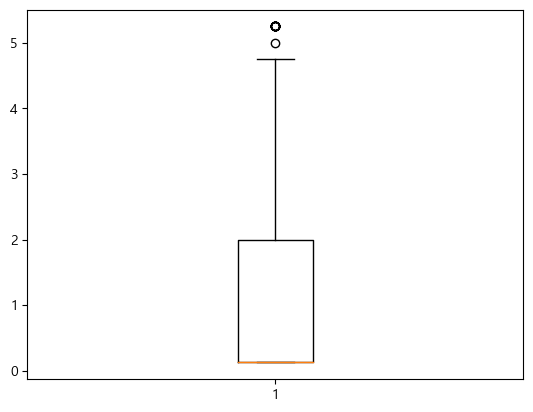

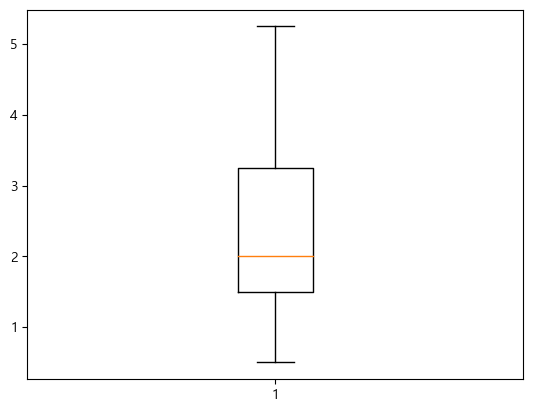

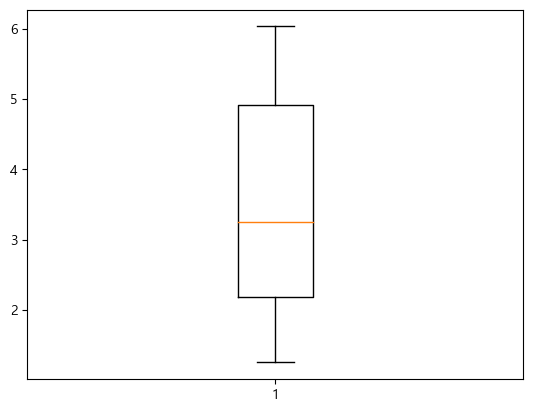

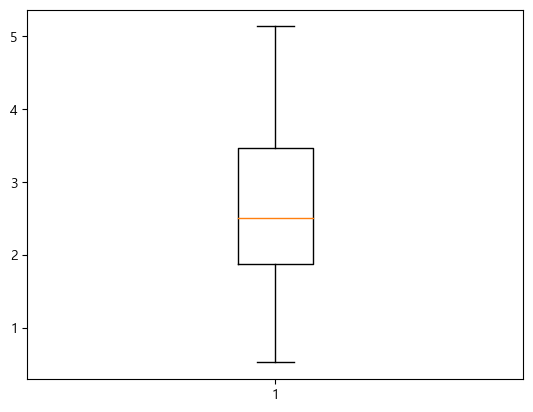

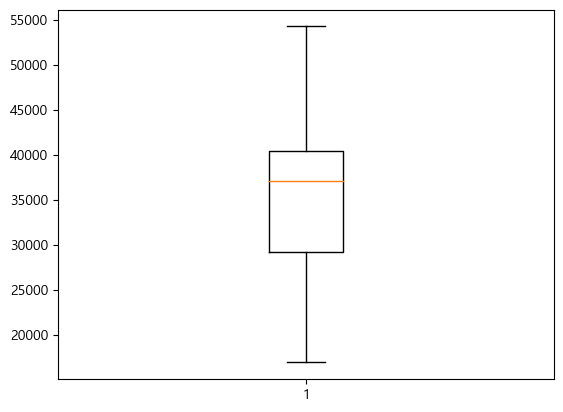

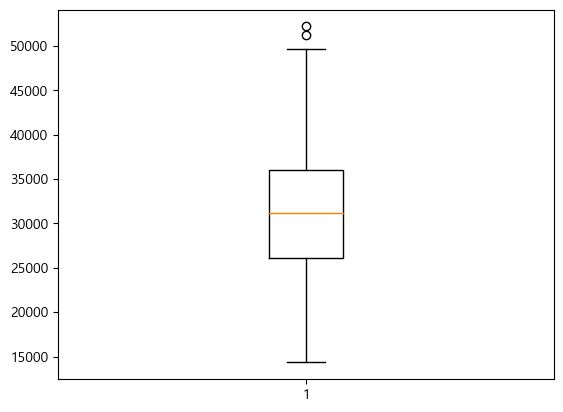

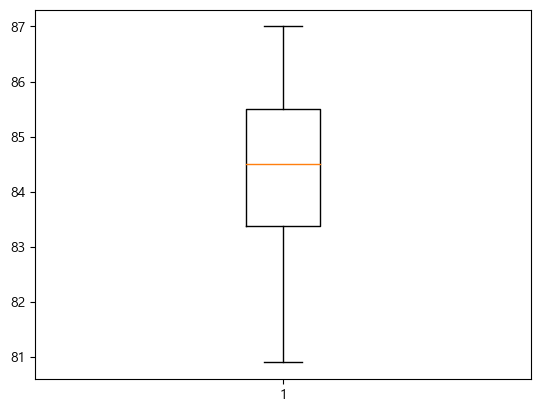

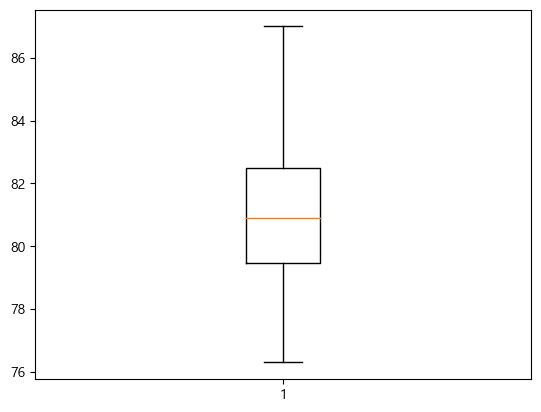

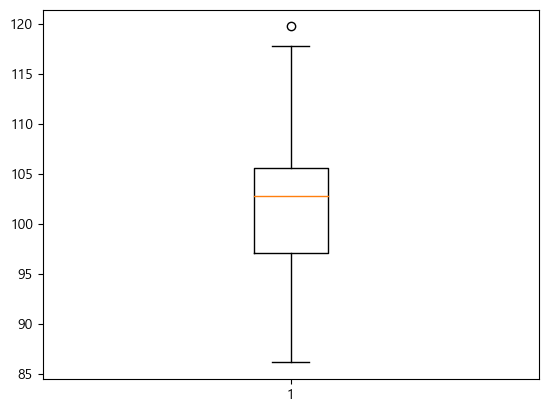

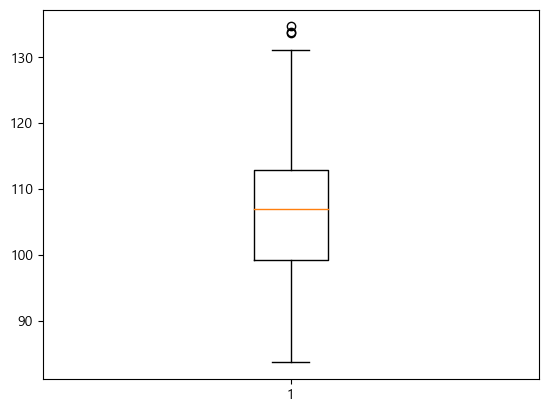

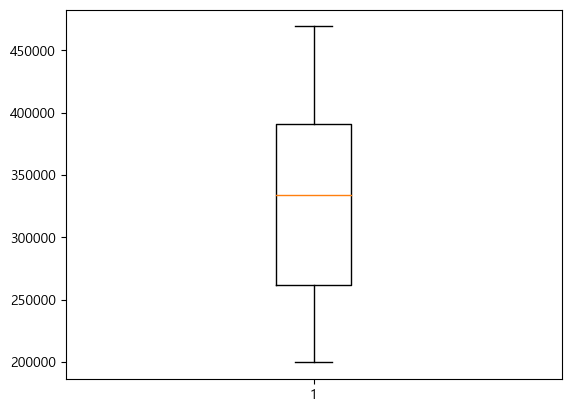

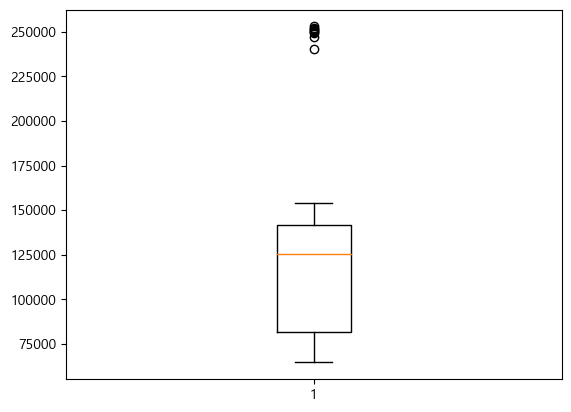

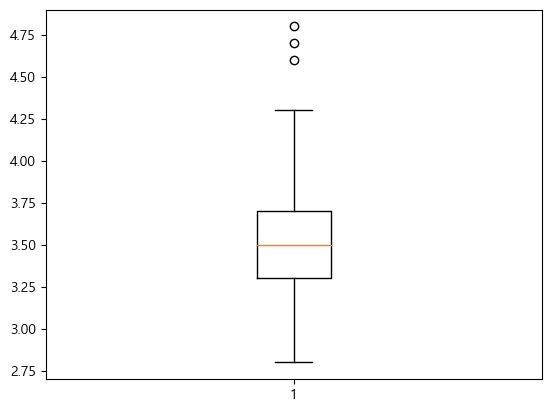

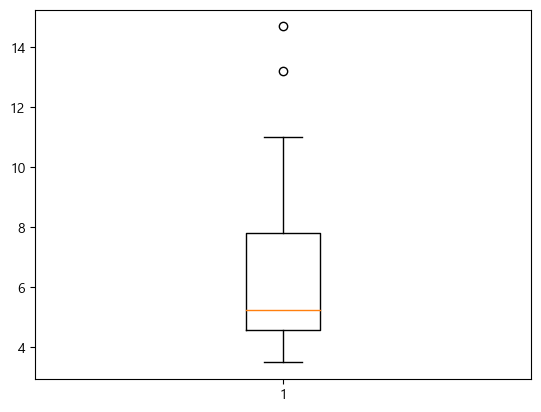

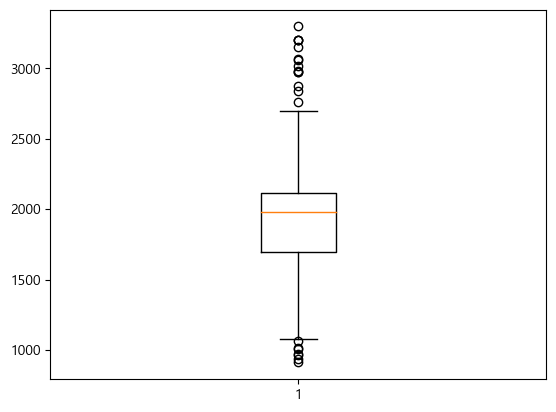

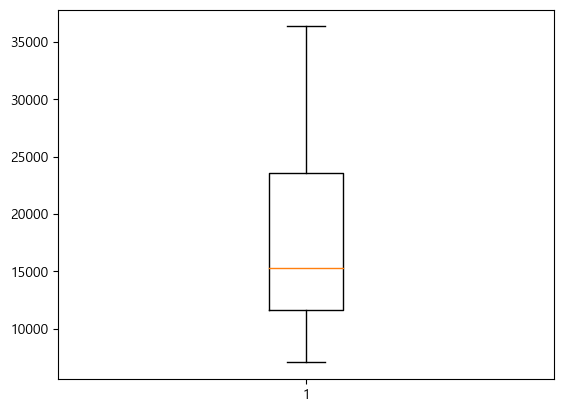

In [274]:
for i in X.columns[1:]:
    plt.boxplot(X[i])
    plt.show()

- 정규성 검정

In [275]:
from scipy import stats
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i], len(a))
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    if p_value1 < alpha:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따를 가능성이 있습니다.")

경제심리지수(원계열) 208
shapiro p_value: 2.9612953755808746e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 7.687273019063485e-12 데이터는 정규 분포를 따르지 않습니다.
뉴스심리지수 208
shapiro p_value: 6.599547077712486e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.7218304250455933e-09 데이터는 정규 분포를 따르지 않습니다.
원자재구입가격실적 208
shapiro p_value: 1.626969670098788e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 4.856767169253797e-09 데이터는 정규 분포를 따르지 않습니다.
M2(말잔, 원계열) 208
shapiro p_value: 7.807794645486865e-06 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.0006437755171336477 데이터는 정규 분포를 따르지 않습니다.
미국M2 208
shapiro p_value: 1.0931620053611368e-09 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 2.1406835087530317e-05 데이터는 정규 분포를 따르지 않습니다.
USBIR 208
shapiro p_value: 1.2521455828303348e-18 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.960184598601052e-10 데이터는 정규 분포를 따르지 않습니다.
KOBIR 208
shapiro p_value: 4.709539069835955e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.00047530791491373734 데이터는 정규 분포를 따르지 않습니다.
KOTN 208
shapiro p_value: 2.03756

- VIF 확인

In [276]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [277]:
# VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Features           VIF
0   경제심리지수(원계열)    572.014239
1        뉴스심리지수    437.883668
2     원자재구입가격실적    302.344679
3   M2(말잔, 원계열)   2439.592696
4          미국M2   1003.333972
5         USBIR     29.490352
6         KOBIR    174.844954
7          KOTN    251.734040
8          USTN    124.736117
9      달러결제수출금액    628.658923
10     달러결제수입금액    828.646710
11     달러결제수출비율  10278.696255
12     달러결제수입비율   7020.251446
13    한국생산자물가지수   7044.460173
14    미국생산자물가지수   7192.409916
15      한국외환보유액   2285.029465
16      미국외환보유액    105.497178
17        한국실업률    271.790209
18        미국실업률     45.307192
19        KOSPI    347.643354
20    Dow Jones    503.793831


- 공분산 확인

<Axes: >

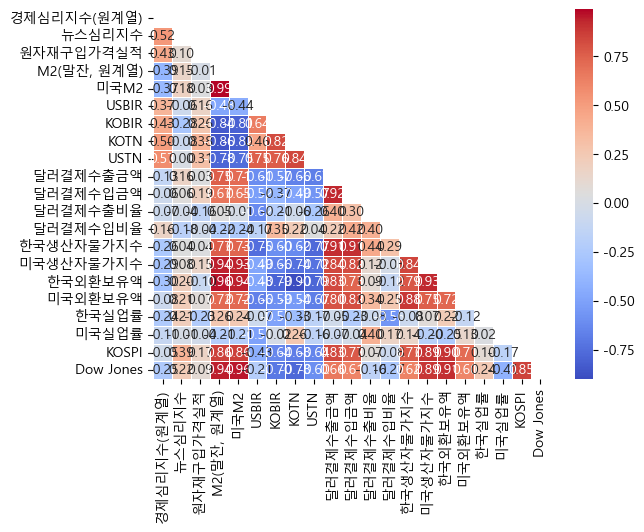

In [278]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

## 데이터 전처리

In [279]:
# 실적과 전망 중 실적이 객관적이므로 전망을 drop
# X.drop(['수출전망', '원자재구입가격전망'], axis=1, inplace=True)

In [280]:
# 수출을 달러로 결제하면 결제대금을 달러로 받고 원화로 바꾸려하니 원/달러 환율에는 음의 영향으로 예상
# 반대로 달러결제 수입은 결제대금을 달러로 지급해야 해서 원화를 달러로 바꾸려 하니 원/달러 환율에는 양의 영향의로 예상
# so 달러결제수입금액 - 달러결제수출금액

- 달러결제수입금액 - 달러결제수출금액

In [281]:
X['달러결제순수입액'] = X['달러결제수입금액'] - X['달러결제수출금액']
X.drop(['달러결제수입금액', '달러결제수출금액'], axis=1, inplace=True)

- 한국M2 / 미국M2

In [282]:
# 한국M2를 미국M2로 나눠 환율과 단위 일치
X['KO/US M2'] = X['M2(말잔, 원계열)'] / X['미국M2']
X.drop(['M2(말잔, 원계열)', '미국M2'], axis=1, inplace=True)

- 미국기준금리 - 한국기준금리
- 미국 - 한국 10년물 국채수익률

In [283]:
# RIBOR금리 런던에서 담합이 있었으므로 제거
# 미국금리가 원/달러 환율에 양의 영향이 예상
X['BIRDIFF'] = X['USBIR'] - X['KOBIR']
X['TNDIFF'] = X['USTN'] - X['KOTN']
X.drop(['USBIR', 'KOBIR', 'KOTN', 'USTN'], axis=1, inplace=True)

In [284]:
X.columns

Index(['경제심리지수(원계열)', '뉴스심리지수', '원자재구입가격실적', '달러결제수출비율', '달러결제수입비율',
       '한국생산자물가지수', '미국생산자물가지수', '한국외환보유액', '미국외환보유액', '한국실업률', '미국실업률',
       'KOSPI', 'Dow Jones', '달러결제순수입액', 'KO/US M2', 'BIRDIFF', 'TNDIFF'],
      dtype='object')

In [285]:
(X[['경제심리지수(원계열)', '뉴스심리지수']] - 100) / 10
# StandardSacaler된 셈이다

,경제심리지수(원계열),뉴스심리지수
0,-0.47,0.639
1,0.81,1.062
2,1.09,0.398
3,1.04,0.087
4,0.38,0.194
...,...,...
203,0.45,1.148
204,0.57,0.328
205,0.58,0.365
206,0.35,0.364


In [286]:
X['원자재구입가격실적'] = (X['원자재구입가격실적'] - 100) / 100
# StandardSacaler는 아니지만 StandardSacaler된 셈이다

In [287]:
X[['달러결제수출비율', '달러결제수입비율']] = X[['달러결제수출비율', '달러결제수입비율']] / 100
# MinmaxScaler된 셈이다

- 한국외환보유액 / 미국외환보유액

In [288]:
X['KO/US FER'] = X['한국외환보유액'] / X['미국외환보유액']
X.drop(['한국외환보유액', '미국외환보유액'], axis=1, inplace=True)

- 한국생산자물가지수 / 미국생산자물가지수

In [289]:
X['KO/US PPI'] = X['한국생산자물가지수'] / X['미국생산자물가지수']
X.drop(['한국생산자물가지수', '미국생산자물가지수'], axis=1, inplace=True)

- 미국경상수지 - 한국경상수지

In [290]:
X

,경제심리지수(원계열),뉴스심리지수,원자재구입가격실적,달러결제수출비율,달러결제수입비율,한국실업률,미국실업률,KOSPI,Dow Jones,달러결제순수입액,KO/US M2,BIRDIFF,TNDIFF,KO/US FER,KO/US PPI
0,95.3,106.39,0.25,0.823,0.779,3.8,5.3,932.70,10489.94,-3319.3,148.557565,-1.000,-0.292,2.337711,1.035146
1,108.1,110.62,0.21,0.829,0.779,3.7,5.4,1011.36,10766.23,-2591.3,151.540035,-0.750,-0.503,2.533993,1.032485
2,110.9,103.98,0.24,0.820,0.789,3.7,5.2,965.68,10503.76,-1680.5,150.138301,-0.500,-0.289,2.599641,1.019366
3,110.4,100.87,0.26,0.825,0.786,3.7,5.2,911.30,10192.51,-2170.7,151.788132,-0.500,-0.492,2.596480,1.013499
4,103.8,101.94,0.16,0.826,0.798,3.7,5.1,970.21,10467.48,-2202.8,152.821713,-0.250,-0.439,2.641393,1.011457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,104.5,111.48,0.29,0.845,0.811,3.6,3.9,2977.65,36338.30,-1691.1,166.939423,-0.875,-0.677,1.840925,0.854696
204,105.7,103.28,0.34,0.838,0.845,3.3,4.0,2663.34,35131.86,4771.3,167.820811,-1.125,-0.715,1.849416,0.890439
205,105.8,103.65,0.35,0.845,0.816,2.8,3.8,2699.18,33892.60,-2086.5,169.448271,-1.125,-0.865,1.841966,0.884654
206,103.5,103.64,0.53,0.851,0.818,2.8,3.6,2757.65,34678.35,-2100.6,167.133457,-0.875,-0.446,1.853796,0.880099


- 미국주가지수 Dow jones / 한국주가지수 KOSPI

In [291]:
X['KO/US SI'] = X['KOSPI'] / X['Dow Jones']
X.drop(['KOSPI', 'Dow Jones'], axis=1, inplace=True)

- 미국실업률 - 한국실업률

In [292]:
X['EIRDIFF'] = X['미국실업률'] - X['한국실업률']
X.drop(['미국실업률', '한국실업률'], axis=1, inplace=True)

## 데이터 재탐색

- 공분산 hitmap

<Axes: >

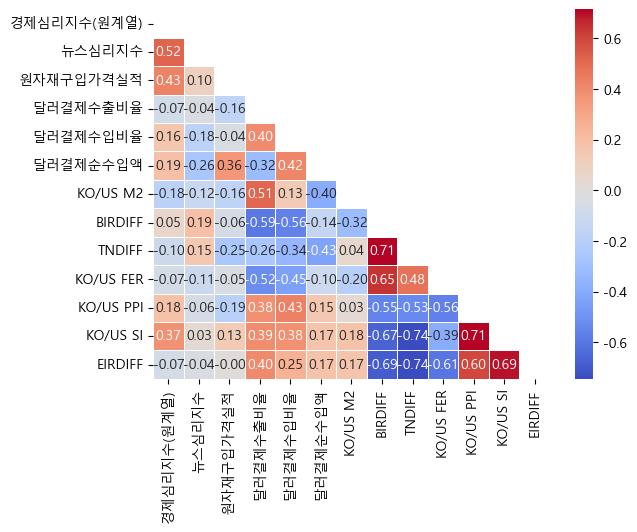

In [293]:
# 상관계수 표
corr_data = X[X.columns].corr()
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

- VIF 확인

In [294]:
import statsmodels.api as sm

In [295]:
# VIF 확인하기 
# X = df.drop(['시점','KRW/USD'], axis=1)
# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
vif.sort_values('VIF Factor',ascending=False)

,Feature,VIF Factor
0,const,13568.749891
12,KO/US SI,8.905967
9,TNDIFF,5.578752
8,BIRDIFF,5.304297
13,EIRDIFF,4.537066
11,KO/US PPI,4.321852
1,경제심리지수(원계열),3.828204
6,달러결제순수입액,3.790113
10,KO/US FER,3.738598
5,달러결제수입비율,3.192489


In [296]:
# # VIF확인하기
# vif = pd.DataFrame()
# vif["Features"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif)

- 정규성 검증

In [297]:
for i in range(len(X.columns)):
    a = X[X.columns[i]]
    print(X.columns[i], len(a))
    statistic, p_value1 = stats.shapiro(a)
    alpha = 0.05  # 유의수준 설정 (일반적으로 0.05 사용)
    if p_value1 < alpha:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('shapiro p_value:', p_value1, "데이터는 정규 분포를 따를 가능성이 있습니다.")
    
    statistic, p_value2 = stats.normaltest(a)
    if p_value2 < alpha:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따르지 않습니다.")
    else:
        print('normaltest p_value:', p_value2, "데이터는 정규 분포를 따를 가능성이 있습니다.")

const 208
shapiro p_value: 1.0 데이터는 정규 분포를 따를 가능성이 있습니다.
normaltest p_value: nan 데이터는 정규 분포를 따를 가능성이 있습니다.
경제심리지수(원계열) 208
shapiro p_value: 2.9612953755808746e-10 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 7.687273019063485e-12 데이터는 정규 분포를 따르지 않습니다.
뉴스심리지수 208
shapiro p_value: 6.599547077712486e-07 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 3.7218304250455933e-09 데이터는 정규 분포를 따르지 않습니다.
원자재구입가격실적 208
shapiro p_value: 1.6269652292066894e-08 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 4.8567671692537615e-09 데이터는 정규 분포를 따르지 않습니다.
달러결제수출비율 208
shapiro p_value: 0.0033180119935423136 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.0027443783439697346 데이터는 정규 분포를 따르지 않습니다.
달러결제수입비율 208
shapiro p_value: 0.18861666321754456 데이터는 정규 분포를 따를 가능성이 있습니다.
normaltest p_value: 0.091139300729545 데이터는 정규 분포를 따를 가능성이 있습니다.
달러결제순수입액 208
shapiro p_value: 0.02267284132540226 데이터는 정규 분포를 따르지 않습니다.
normaltest p_value: 0.01732456944735481 데이터는 정규 분포를 따르지 않습니다.
KO/US M2 208
shapiro p_value: 4.2677125833279206e-08 데이터는 정규 

- 병합해서 to_csv scaled_data

In [298]:
Mdate

0      200501
1      200502
2      200503
3      200504
4      200505
        ...  
203    202112
204    202201
205    202202
206    202203
207    202204
Name: 시점, Length: 208, dtype: int64

In [299]:
scaled_data = pd.concat([Mdate, X,y], axis=1)

In [300]:
filename = 'scaled_data.csv'
scaled_data.to_csv(current_directory+'/'+filename)